# Predicting House Sale Prices

In this project, we will predict house prices using Linear Regression. We have a dataset with a lot of records of individual house sales, where for each sale we have a *price* which is our target variable that we would want to predict, and a lot of features that are all candidates to act as parameters to predict the price. Roughly, the process to follow is "transform the data", "select the features", "train and test" the model.

We'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. This data can be downloaded from [Kaggle](https://www.kaggle.com/datasets/hamzajabbarkhan/ames-housingtsv). (You need a Kaggle account). More background about this dataset can be found [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). An explanation of the columns can be found [here](https://s3.amazonaws.com/dq-content/307/data_description.txt). 

My personal goal for this project is not to create the 'ultimate' house prediction model, but merely to practice my newly-acquired skills. 

The structure of this notebook:
1. Getting started
2. Improve "transform features" 
3. Improve "select features"
4. Improve "train and test" (validation)
5. Summary and possible next steps




## 1. Getting started

After importing libraries and data, I'll do an intial exploration of the data. Also I will create first versions of "transform", "select" and "train-and-test" functions that together will form a "data pipeline". And run them, giving us some sort of 'base line result'.

### 1.1 Import libraries

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

### 1.2 Initial data exploration

In [2]:
# Read in the data and show a sample
ames = pd.read_csv('AmesHousing.tsv', sep = '\t')

# Enable seeing all columns
pd.options.display.max_columns = 100

# Show a sample
ames.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
# Get info about column types and missing values
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

So we have 2930 records, and 82 columns of various data types. Not in all columns the data is complete. (At some point we may want to do additional data exploration such as identifying outliers, however for now let's continue first.)

### 1.3 Initial data pipeline

Let's set up initial version functions that we will use for "transform" - "select" - "train-and-test".

For the "transform" function, this initial version is just a placeholder. No transformations are done.

For the "select" function, this initial version contains just one feature: `Gr Liv Area`, the living area in square feet. This is a numerical variable for which we have complete data, and is like to have a relationship with the sale price.

For the "train and test" function, this initial version will use half of the data for training and the other half for testing. What it returns is the RMSE (Root Mean Square Error) that is calculated off the predicted and actual prices of the test dataset. Its value is an indication of the quality of the predictions: the lower its value, the better the model.

In [4]:
# Initial function to transform features

def transform_feautures(df):
    return df

In [5]:
# Function to select features

def select_features(df):
    features = ['Gr Liv Area', 'SalePrice']
    return df[features]

In [6]:
# Function to train and test

def train_and_test(df):
    train = df[0:1460]
    test = df[1460:]
    
    lr = LinearRegression()
    
    train_selection = select_features(train)
    train_selection_features = train_selection.drop('SalePrice', axis = 1)
    train_selection_target = train_selection['SalePrice']
    lr.fit(train_selection_features, train_selection_target)
    
    test_selection = select_features(test)
    test_selection_features = test_selection.drop('SalePrice', axis = 1)
    test_selection_target = test_selection['SalePrice']
  
    test_predictions = lr.predict(test_selection_features)
      
    lr_mse = mean_squared_error(test_selection_target, test_predictions)
    lr_rmse = lr_mse**0.5
   
    return lr_rmse
    

### 1.4 Initial run (baseline)

Let's now do an initial run of transform - select - train-and-test. (That is: run `train-and-test`. This will call the select function. Transform is a placeholder at this point, so no point in running it.)

In [7]:
# Run train and test
train_and_test(ames)

57088.25161263909

So what we can call our baseline, a linear regression model with only "Gr Liv Area" gives an RMSE of 57088.

This should improve (that is, get lower) after improving the model, which will be done in next sections.

## 2. Improve "transform features"

During the initial data exploration, we could see that the data as it was imported can and should not be used straightaway for machine learning.

In this section, we'll improve the data. Some columns will be removed and transformed, and we'll do a bit of "feature engineering" as well by creating new, more meaningful, columns based on existing ones.

How this will be approached is that first a lot of analysis of the data will be done to identify what exactly should be changed in the data. That will then be collected and executed in an updated version of the "transform features" function (for which we had a placeholder only so far). Two such rounds of "first analyze, then update" will be done.

### 2.1 Address columns (features) with missing data

Let's check for all columns which percentage of data is missing.

In [8]:
# Avoid truncation of output
pd.options.display.max_rows = 100

# Get percentage of missing values for all columns
(ames.isnull().mean() * 100).sort_values(ascending = False)

Pool QC            99.556314
Misc Feature       96.382253
Alley              93.242321
Fence              80.477816
Fireplace Qu       48.532423
Lot Frontage       16.723549
Garage Qual         5.426621
Garage Yr Blt       5.426621
Garage Cond         5.426621
Garage Finish       5.426621
Garage Type         5.358362
Bsmt Exposure       2.832765
BsmtFin Type 2      2.764505
BsmtFin Type 1      2.730375
Bsmt Cond           2.730375
Bsmt Qual           2.730375
Mas Vnr Type        0.784983
Mas Vnr Area        0.784983
Bsmt Full Bath      0.068259
Bsmt Half Bath      0.068259
Garage Area         0.034130
Garage Cars         0.034130
Total Bsmt SF       0.034130
Bsmt Unf SF         0.034130
BsmtFin SF 2        0.034130
BsmtFin SF 1        0.034130
Electrical          0.034130
Exterior 2nd        0.000000
Exterior 1st        0.000000
Roof Matl           0.000000
Roof Style          0.000000
Year Remod/Add      0.000000
Year Built          0.000000
SalePrice           0.000000
Overall Cond  

Seeing this, let's distinguish the following:
* columns where a lot of data is missing
* Garage related columns
* Basement related columns
* Masonry related columns
* Electrical

**columns where a lot of data is missing**

There are 5 columns where a lot of data is missing (from 16 to 99%).
Arguably some of these could have significant impact on a house price actually.
E.g. "Misc Feature" might indicate there is an elevator or a tennis court.
Also, the observation that 'pool quality' is mostly empty is not so strange, given that most houses don't have a pool in the first place. (Which can be identified via "Pool area").

We may want to explore this later, but for now let us just drop all these columns since there is so much data missing.

**Garage related columns**

Then, there are 5 "Garage" columns with some 5.5% of missing data. Since this is not a very high percentage, let's - rather than deleting the columns altogether - analyse what's in here and whether we can still use this. From these 5 columns, 4 are categorical, and one is the year built. And two where just one value is missing. Let's explore what data is in these columns.

In [9]:
# Create dataframe subset with all garage related columns
garage_data = ames.loc[:,ames.columns.str.contains('Garage')]
garage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 7 columns):
Garage Type      2773 non-null object
Garage Yr Blt    2771 non-null float64
Garage Finish    2771 non-null object
Garage Cars      2929 non-null float64
Garage Area      2929 non-null float64
Garage Qual      2771 non-null object
Garage Cond      2771 non-null object
dtypes: float64(3), object(4)
memory usage: 160.4+ KB


In [10]:
# Show a sample to get an impression of the garage related data
garage_data.head(10)

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,Attchd,1960.0,Fin,2.0,528.0,TA,TA
1,Attchd,1961.0,Unf,1.0,730.0,TA,TA
2,Attchd,1958.0,Unf,1.0,312.0,TA,TA
3,Attchd,1968.0,Fin,2.0,522.0,TA,TA
4,Attchd,1997.0,Fin,2.0,482.0,TA,TA
5,Attchd,1998.0,Fin,2.0,470.0,TA,TA
6,Attchd,2001.0,Fin,2.0,582.0,TA,TA
7,Attchd,1992.0,RFn,2.0,506.0,TA,TA
8,Attchd,1995.0,RFn,2.0,608.0,TA,TA
9,Attchd,1999.0,Fin,2.0,442.0,TA,TA


Let's get a better understanding of the data by counting the values.

In [11]:
# For all garage related columns, show the frequency of the different values 
for col in garage_data.columns:
    print('\n',col,'\n')
    print(garage_data[col].value_counts())


 Garage Type 

Attchd     1731
Detchd      782
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64

 Garage Yr Blt 

2005.0    142
2006.0    115
2007.0    115
2004.0     99
2003.0     92
         ... 
1919.0      1
2207.0      1
1933.0      1
1908.0      1
1943.0      1
Name: Garage Yr Blt, Length: 103, dtype: int64

 Garage Finish 

Unf    1231
RFn     812
Fin     728
Name: Garage Finish, dtype: int64

 Garage Cars 

2.0    1603
1.0     778
3.0     374
0.0     157
4.0      16
5.0       1
Name: Garage Cars, dtype: int64

 Garage Area 

0.0       157
576.0      97
440.0      96
484.0      76
240.0      69
         ... 
639.0       1
869.0       1
1390.0      1
317.0       1
899.0       1
Name: Garage Area, Length: 603, dtype: int64

 Garage Qual 

TA    2615
Fa     124
Gd      24
Po       5
Ex       3
Name: Garage Qual, dtype: int64

 Garage Cond 

TA    2665
Fa      74
Gd      15
Po      14
Ex       3
Name: Garage Cond, dtype: int64


Let's quickly check the row(s) where Garage Cars or Garage Area is missing. (For which there is only one missing value.)

In [12]:
# Show the row(s) where Garage Cars or Garage Area is missing
ames[ames['Garage Cars'].isnull() | ames['Garage Area'].isnull()] 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


Now, using the observations above, let's assess what to do with all of this.

Starting with the final one, that one row where Garage Cars and Garage Area is missing. That row seems okay as such otherwise, so no need to delete it. Rather, let's impute data, where the following seems to make sense based on what we saw: 
* For `Garage Cars`: impute most common value
* For `Garage Area`: impute column mean

Then, the other rows, where some 150 values are missing. Imputing the most common value may initially *seem* attractive. However, what may actually be a likely explanation for the missing values is that these houses don't have a garage at all, so it is also not possible to specify, say, its type or quality. According to the data description, that should be covered by a value "NA" though for the categorical columns. But maybe that value is not used when it is supposed to be?

Let's do a check:

In [13]:
# Show a sample where Garage Type is zero
ames[ames['Garage Type'].isnull()][['Garage Type', 'Garage Area', 'Garage Finish', 'Garage Qual', 'Garage Cond']].head(10)

,Garage Type,Garage Area,Garage Finish,Garage Qual,Garage Cond
27,NaN,0.0,NaN,NaN,NaN
119,NaN,0.0,NaN,NaN,NaN
125,NaN,0.0,NaN,NaN,NaN
129,NaN,0.0,NaN,NaN,NaN
130,NaN,0.0,NaN,NaN,NaN
170,NaN,0.0,NaN,NaN,NaN
171,NaN,0.0,NaN,NaN,NaN
186,NaN,0.0,NaN,NaN,NaN
203,NaN,0.0,NaN,NaN,NaN
206,NaN,0.0,NaN,NaN,NaN


Indeed, it seems that there is no garage as the Garage Area is 0.
So, with that observation, let's do the following:
* So, for 'Garage Type', 'Garage Finish', 'Garage Qual' and 'Garage Cond', let's impute the "NA" value for missing values.
* For 'Garage Yr Blt', let us impute the most frequent value.

*Note: in retrospect, something similar might as well have been applied to some of the columns that we deleted altogether earlier on. Also for this, the "missing values" could possible be replaced by something like a designated "NA" value.*

**Basement related columns**

Next, let's check the basement related columns, that all have missing data. Just like for garage, not that much though, so let's analyze first, then decide what to do.

In [14]:
# Create dataframe subset with all basement related columns
basement_data = ames.loc[:,ames.columns.str.contains('Bsmt')]
basement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
Bsmt Qual         2850 non-null object
Bsmt Cond         2850 non-null object
Bsmt Exposure     2847 non-null object
BsmtFin Type 1    2850 non-null object
BsmtFin SF 1      2929 non-null float64
BsmtFin Type 2    2849 non-null object
BsmtFin SF 2      2929 non-null float64
Bsmt Unf SF       2929 non-null float64
Total Bsmt SF     2929 non-null float64
Bsmt Full Bath    2928 non-null float64
Bsmt Half Bath    2928 non-null float64
dtypes: float64(6), object(5)
memory usage: 251.9+ KB


In [15]:
# Show a sample of basement related data
basement_data.head(20)

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
0,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,1.0,0.0
1,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,0.0,0.0
2,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,0.0,0.0
3,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,1.0,0.0
4,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,0.0,0.0
5,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,0.0,0.0
6,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,1.0,0.0
7,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,0.0,0.0
8,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,1.0,0.0
9,TA,TA,No,Unf,0.0,Unf,0.0,994.0,994.0,0.0,0.0


For all of the 6 numerical columns, only 1 or 2 values are missing. Not unlikely that is going to be for the same rows. Let's check.

In [16]:
# Show the row(s) where Bsmt Full Bath (one of the numerical columns) is missing
basement_data[basement_data['Bsmt Full Bath'].isnull()] 

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


In [17]:
# Do the same for the orginal ames dataset: show the rows for Bsmt Full Bath is missing.
ames[ames['Bsmt Full Bath'].isnull()] 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


Indeed: it is two rows where 1 or 2 of the numerical basement-related values are missing. Also seeing the description and the sample data, let's impute the column mean for the missing values in these 6 columns.

Then, let's check what data there is for 5 categorical basement-related columns. Just like we saw for garage, "there is no basement at all" would be a plausible explanation.

Let's do a check.

In [18]:
# Find rows where Basement condition is null, however there is a basement area.
ames[(ames['Bsmt Cond'].isnull()) & (ames['Total Bsmt SF'] != 0.0) ][['Bsmt Cond', 'Total Bsmt SF']].head(10)

,Bsmt Cond,Total Bsmt SF
1341,NaN,NaN


In [19]:
# Check what values are used for Basement condition
ames['Bsmt Cond'].value_counts()

TA    2616
Gd     122
Fa     104
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

Exactly. So missing values indicate there is no basement at all. While according to the description 'NA' should have been entered. Let's still impute that value (NA) still then for all missing values in the categorical basement-related columns.

**Masonry related columns**

Since there are only a few rows with missing values for these, let's check them straightaway.

In [20]:
# Get rows with missing masonry related values
ames[(ames['Mas Vnr Type'].isnull()) | (ames['Mas Vnr Area'].isnull())]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
55,56,528240070,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2.0,440.0,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
484,485,528275160,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,257500
517,518,528458020,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,Partial,225000
538,539,531371050,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
867,868,907260030,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Ex,Y,SBrkr,840,885,0,1725,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,RFn,2.0,550.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,198500
1095,1096,528290090,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,176000
1119,1120,528439010,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,247000
1122,1123,528462040,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2.0,480.0,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
1127,1128,528480160,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,813.0,813.0,GasA,Ex,Y,SBrkr,822,843,0,16

So in each of these rows, *both* of the masonry related values are NaN. Let's check existing values.

In [21]:
ames['Mas Vnr Type'].value_counts()

None       1752
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: Mas Vnr Type, dtype: int64

In [22]:
ames['Mas Vnr Area'].value_counts()

0.0      1748
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
518.0       1
109.0       1
440.0       1
322.0       1
175.0       1
Name: Mas Vnr Area, Length: 445, dtype: int64

Since 'None' (meaning: there is no masonry) is the most common value, imputing "None" for the type, and "0.0" for the area seems sensible where the values are missing.

**Electrical**

Let's check the one row where the value is missing for Electrical.

In [23]:
ames[ames['Electrical'].isnull()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,1578,916386080,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


Let's check typical values for Electrical.

In [24]:
ames['Electrical'].value_counts()

SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

Let's impute the most common value.

### 2.3 Implement learnings in transform_features

Let's now implement all of the above by creating an updated version of the `transform_features` function. (We will create a new one with a different name actually, not to have multiple definitions of the same function.)

In [25]:
# Function to transform features, part 2

def transform_features_2(df):
    # drop columns where > 15% of values is missing
    many_missing_values_columns = df[df.columns[ames.isnull().mean() >0.15]]
    df = df.drop(many_missing_values_columns, axis = 1)
    
    # impute value "NA" for columns where observed that that is sensible
    columns_to_impute_na = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
    df[columns_to_impute_na] = df[columns_to_impute_na].fillna('NA')
    
    # impute most common value for columns where observed that that is sensible
    columns_to_impute_most_common = ['Garage Cars','Garage Yr Blt', 'Electrical', 'Mas Vnr Type', 'Mas Vnr Area']
    for col in columns_to_impute_most_common:
        df[col] = df[col].fillna(df[col].value_counts().index[0])
       
    # impute column mean for columns where observed that that is sensisble
    columns_to_impute_mean = ['Garage Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
    df[columns_to_impute_mean] = df[columns_to_impute_mean].fillna(df[columns_to_impute_mean].mean())
    
    return df

In [26]:
# Create new dataframe with transformed features
ames_nonull = transform_features_2(ames)

In [27]:
# Validate that 6 columns were deleted, and that there are no missing values anymore
ames_nonull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 76 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Area           2930 non-null int64
Street             2930 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-null object
Roof Matl          2930 non-null object
Exterior 1st       29

For each of the different types of imputations, check the result.

In [28]:
# Imputation of 'NA'
print('Example of imputation of NA', '\n')
print (ames['Garage Type'].value_counts())
print (ames_nonull['Garage Type'].value_counts())

print('\n', 'Example of imputation of most common value')
print(ames['Mas Vnr Type'].value_counts())
print(ames_nonull['Mas Vnr Type'].value_counts())

print('\n', 'Example of imputation of column mean')
print(ames['Garage Area'].mean())
print(ames_nonull['Garage Area'].mean())

Example of imputation of NA 

Attchd     1731
Detchd      782
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64
Attchd     1731
Detchd      782
BuiltIn     186
NA          157
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64

 Example of imputation of most common value
None       1752
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: Mas Vnr Type, dtype: int64
None       1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: Mas Vnr Type, dtype: int64

 Example of imputation of column mean
472.8197336975077
472.8197336975077


### 2.3 Features to transform

Features `Year Built` and `Year Remod/Ad` contains potentially interesting information as such. However, rather than using the year as such, to make it more useful, we could transform this to "age of the house at the moment of sale" and "years since last remodeling at the year of sale".

Let's check what we get if we were to do that.

In [29]:
# Construct years_since_construction and check values
years_since_construction = ames_nonull['Yr Sold'] - ames_nonull['Year Built']
years_since_construction.describe()

count    2930.000000
mean       36.434130
std        30.291357
min        -1.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
dtype: float64

In [30]:
# Construct years_since_remodel and check values
years_since_remodel = ames_nonull['Yr Sold'] - ames_nonull['Year Remod/Add']
years_since_remodel.describe()

count    2930.000000
mean       23.523891
std        20.858846
min        -2.000000
25%         4.000000
50%        15.000000
75%        42.750000
max        60.000000
dtype: float64

In [31]:
# Check also for the difference between the two: the age of the house at remodeling
house_age_at_remodel = years_since_construction - years_since_remodel
house_age_at_remodel.describe()

count    2930.000000
mean       12.910239
std        24.032451
min        -1.000000
25%         0.000000
50%         0.000000
75%        18.000000
max       127.000000
dtype: float64

That looks mostly okay, apart from values lower than 0. Let's check those.

In [32]:
# Check houses that were sold before being built
ames_nonull[ames_nonull['Yr Sold'] < ames_nonull['Year Built']]

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2180,2181,908154195,20,RL,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,17000,10,2007,New,Partial,183850


In [33]:
# Check houses that were sold before being remodelled
ames_nonull[ames_nonull['Yr Sold'] < ames_nonull['Year Remod/Add']]


,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1702,1703,528120010,60,RL,16659,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1582.0,1582.0,GasA,Ex,Y,SBrkr,1582,570,0,2152,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Detchd,2007.0,Unf,2.0,728.0,TA,TA,Y,0,368,0,0,0,0,0,6,2007,New,Partial,260116
2180,2181,908154195,20,RL,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750


In [34]:
# Check houses that were remodelled before being built
ames_nonull[ames_nonull['Year Remod/Add'] < ames_nonull['Year Built']]

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
850,851,907194160,20,RL,10739,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Gd,TA,PConc,Gd,TA,No,GLQ,1259.0,Unf,0.0,172.0,1431.0,GasA,Ex,Y,SBrkr,1444,0,0,1444,1.0,0.0,2,0,3,1,Gd,6,Typ,0,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,144,40,0,0,0,0,0,4,2009,WD,Normal,203000


Bit odd what we see:
* Sold in 2007, built in 2008.
* Sold in 2007, remodelled in 2008 or 2009. (Well, not impossible, but that info could not be in the sales records.)
* Built in 2002, remodelled in 2001.

It's only a few records. The linear regression model as such should be able to deal (technically) with a few negative values and I don't expect it to have a lot of impact. But let's set any values below 0 simply to 0 for the two new columns. (We'll ignore that one house was remodeled a year before being built.)

In [35]:
# Construct years_since_construction, set minimum to 0, check values
years_since_construction = (ames_nonull['Yr Sold'] - ames_nonull['Year Built']).clip(lower = 0)
years_since_construction.describe()

count    2930.000000
mean       36.434471
std        30.290941
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
dtype: float64

In [36]:
# Construct years_since_remodel, set minimum to 0, check values
years_since_remodel = (ames_nonull['Yr Sold'] - ames_nonull['Year Remod/Add']).clip(lower = 0)
years_since_remodel.describe()     


count    2930.000000
mean       23.525256
std        20.857256
min         0.000000
25%         4.000000
50%        15.000000
75%        42.750000
max        60.000000
dtype: float64

That looks okay, we will (a bit later) add this information to our dataframe.

### 2.4 Features not to use

There are columns that should not be used for our prediction model at all, for a variety of reasons.

**replaced by something better**

In the previous section, we decided to add features `years_since_construction` and `years_since_remodel`. The columns `Year Built` and `Year Remod/Add` can (should) now be deleted. 

**administrative columns**

The columns `Order` and `PID` have nothing to do with the house (and its sale price) as such, and should not be used.

**data leakage**

Several features do not describe the house as such, but the *sale of the house*. They are:
* `Mo Sold`
* `Yr Sold`
* `Sale Type`
* `Sale Condition`

It is not trivial what to do with these. As such, they likely *do* have an impact on the sale price. Market conditions change, and it is well known that the very same house will be sold for a very different price in one year or the other. Also whether something is a regular sale, or e.g. a foreclosure sale, does have an impact on the price.

However, goal of our model is to predict house prices based on their features. Also so it could be used to set an expected price for *future* sales. And from that perspective it is incorrect to include these in our regression model, so we will leave them out.

If we *would* want to include "market conditions" as an input, we should combine our data with some other data that represents market conditions.

**duplicate price info**

Column `Misc Val` contains the value of a 'miscalleneous feature' (such as a pool). That value (or rather: the true market value) is already part of the house price itself, so using this as a factor to predict a house price would be incorrect. (Note that `Misc Feature` itself was also dropped earlier on.)

### 2.5 Implement learnings in `transform_features`

Let's now implement the learnings above by updating the `transform_features` method accordingly. (That is, by adding a 3rd part to it.)

In [37]:
def transform_features_3(df):
    # add years_since_constrution and years_since_remodel
    df['years_since_construction'] = (df['Yr Sold'] - df['Year Built']).clip(lower = 0)
    df['years_since_remodel'] = (df['Yr Sold'] - df['Year Remod/Add']).clip(lower = 0)
    
    # drop columns for which we concluded they should be dropped
    columns_to_drop = ['Year Built', 'Year Remod/Add', 'Order', 'PID', 'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition']
    df = df.drop(columns_to_drop, axis=1)
    return df

In [38]:
# Create a new dataframe, based on the previous dataframe
ames_cleaned = transform_features_3(ames_nonull)

In [39]:
# Check: columns should be dropped, still 2930 entries, all non-null
ames_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 70 columns):
MS SubClass                 2930 non-null int64
MS Zoning                   2930 non-null object
Lot Area                    2930 non-null int64
Street                      2930 non-null object
Lot Shape                   2930 non-null object
Land Contour                2930 non-null object
Utilities                   2930 non-null object
Lot Config                  2930 non-null object
Land Slope                  2930 non-null object
Neighborhood                2930 non-null object
Condition 1                 2930 non-null object
Condition 2                 2930 non-null object
Bldg Type                   2930 non-null object
House Style                 2930 non-null object
Overall Qual                2930 non-null int64
Overall Cond                2930 non-null int64
Roof Style                  2930 non-null object
Roof Matl                   2930 non-null object
Exterior 1st   

In [40]:
# Double-check one of the newly added columns (should be same as when analyzing the column)
ames_cleaned['years_since_construction'].describe()

count    2930.000000
mean       36.434471
std        30.290941
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: years_since_construction, dtype: float64

That all looks in line with expecations.

## 3. Improve "select features" 

Having done data transformations, we have cleaner data now. We also have 69 features still, which is a lot. In this section we are going to select. And, along the way, also run train-and-test with the updated selections.

I'll do this in two stages. First we focus on numerical features. Then we'll add categorical features into the mix.

### 3.1 Numerical features

For numerical variables, let's start with creating a correlation heatmap. So we get more insight both in which features relate most to our target variable (SalePrice), and in which features relate to each other (and therefore may not all need to be included).

Before doing so, let's study these variables better. Some variables are *technically* numerical, but actually categorical if you look at the data. So let's first check a small data sample again to ensure we pick the correct columns.

In [41]:
# Select technically numerical columns
ames_tech_numerical_columns = ames_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Show a sample of technically numerical columns
ames_cleaned[ames_tech_numerical_columns].head(5)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,years_since_construction,years_since_remodel
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,189900,13,12


The following are 'discrete' variables: variables about the number of rooms, bathrooms, or parking places in the garage. And also our newly constructed years since construction and years since remodel.

The following are 'nominal' categorical variables: `MS SubClass`
That is, the numerical value has no intrinsic meaning at all.

The following are 'ordinal' categorical variables: `Overall Qual`, `Overall Cond`. Let me first show the possible values for one of them (Overall Qual: "Rates the overall material and finish of the house"), then elaborate.

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

The number *does* have a meaning in a sense that a higher number indicates a better quality or condition. However (as opposed to the discrete variables) we cannot give much meaning to the distances between the numbers: is the difference between 2 and 3 (Poor and Fair) the same as the difference between 7 and 8 (Good and Very Good)? Is 10 twice as good as 5?

Let's do the following:
* Nominal: exclude. We should include it when assessing the categorical features.
* Discrete: include. Although in case of few values (say, only 0, 1, 2) one may argue that treating it as categorical would be a better choice. 
* Ordinal: include. At least for now. Let's assess their correlation with SalePrice. We may later still decide whether to treat them as categorical.

Based on that, let's now create a heatmap.

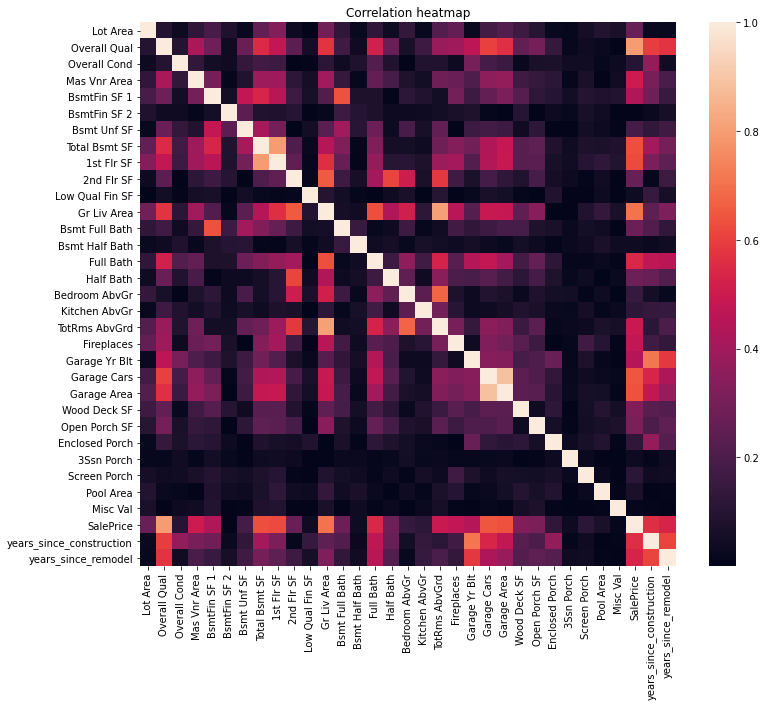

In [42]:
# Select numerical columns: technically numerical, but exculding nominal
ames_numerical_columns = ames_tech_numerical_columns.drop('MS SubClass')
# ames_numerical_columns = ames_cleaned.select_dtypes(include=['float64','int64']).columns

# Calculate correlation matrix
ames_numerical_correlation = ames_cleaned[ames_numerical_columns].corr()

# Create a heatmap of the absolute values
fig = plt.subplots(figsize=(12,10))
sns.heatmap(ames_numerical_correlation.abs())
plt.title('Correlation heatmap')
plt.show()

Some observations:
* some features are (not surprisingly) highly correlated, such as `Garage Cars` and `Garage Area`. We may want to not include both in our model
* overall, there is quite a lot of 'dark' though, indicating that features are not very related to each other; so quite some of these features may be unique enough to include them

What we are especially interested in, is the correlation between the features and the SalePrice. Let's show this in a more readable format.

In [43]:
# Show correlation of numerical features with SalePrice (absolute value)
ames_numerical_correlation['SalePrice'].abs().sort_values(ascending = False)

SalePrice                   1.000000
Overall Qual                0.799262
Gr Liv Area                 0.706780
Garage Cars                 0.647812
Garage Area                 0.640385
Total Bsmt SF               0.632105
1st Flr SF                  0.621676
years_since_construction    0.558914
Full Bath                   0.545604
years_since_remodel         0.534963
Mas Vnr Area                0.502196
TotRms AbvGrd               0.495474
Fireplaces                  0.474558
Garage Yr Blt               0.442271
BsmtFin SF 1                0.432794
Wood Deck SF                0.327143
Open Porch SF               0.312951
Half Bath                   0.285056
Bsmt Full Bath              0.275894
2nd Flr SF                  0.269373
Lot Area                    0.266549
Bsmt Unf SF                 0.182805
Bedroom AbvGr               0.143913
Enclosed Porch              0.128787
Kitchen AbvGr               0.119814
Screen Porch                0.112151
Overall Cond                0.101697
P

The higher the number, the more correlation with the SalePrice. It may be a bit arbitrary, but let's not use columns that have a correlation lower than 0.4. Below 0.4 there is quite a gap, and this leaves us with approx. half of these columns.

In [44]:
# Get the numerical features that have an (absolute) correlation > 0.5 with SalePrice
anc = ames_numerical_correlation['SalePrice'].abs()
anc = anc.loc[anc > 0.5]

# Remove SalePrice itself from this list
anc = anc.drop('SalePrice')

# Print feautures, with their correlation
print(anc)

# Get list with these feature names
numerical_features_correlated = anc.index

Overall Qual                0.799262
Mas Vnr Area                0.502196
Total Bsmt SF               0.632105
1st Flr SF                  0.621676
Gr Liv Area                 0.706780
Full Bath                   0.545604
Garage Cars                 0.647812
Garage Area                 0.640385
years_since_construction    0.558914
years_since_remodel         0.534963
Name: SalePrice, dtype: float64


So all of these have a clear correlation with the SalePrice. But, as observed, some of these columns may highly relate to *each other*. While there may be more advanced techniques, let's find those, pairwise.

In [45]:
# Get a new correlation matrix with only the selected columns
q = ames_cleaned[numerical_features_correlated].corr()

# Get this matrix in list format (absolute values, exclude values of 1)
s = q[q < 1].abs().unstack()

# Sort to get the most correlated pairs of features
so = s.sort_values(kind="quicksort", ascending = False)

# Display the most correlated pairs (every 2nd row to not show duplicates)
so.iloc[::2].head(20)

Garage Cars               Garage Area                 0.889662
1st Flr SF                Total Bsmt SF               0.800659
Gr Liv Area               Full Bath                   0.630321
years_since_remodel       years_since_construction    0.613327
Garage Cars               Overall Qual                0.599392
years_since_construction  Overall Qual                0.596998
Overall Qual              years_since_remodel         0.570841
                          Gr Liv Area                 0.570556
Garage Area               Overall Qual                0.563445
Gr Liv Area               1st Flr SF                  0.562166
Total Bsmt SF             Overall Qual                0.547088
Garage Cars               years_since_construction    0.537187
Full Bath                 Overall Qual                0.522263
1st Flr SF                Garage Area                 0.491197
Garage Cars               Gr Liv Area                 0.488854
Garage Area               Total Bsmt SF               0

So there are some columns that are highly correlated. If we look at them more closely, some will obviously dependent indeed: e.g. Garage Area and Garage Cars. That looks redundant. Others may correlate, but are possibly independent still.

As mentioned, there may be more advanced techniques, but for now let's do the following:
* Ignore `Garage Cars`. (As `Garage Area` is continuous and thus more precise.)
* Ignore `Total Bsmt SF`. (As `1st Flr SF` is an overlapping indicator of the house size.)

In [46]:
# Get numerical features so far
numerical_features_to_use = numerical_features_correlated.to_list()

# Remove two features from those that are highly correlated to others
numerical_features_to_use.remove('Garage Cars')
numerical_features_to_use.remove('Total Bsmt SF')

# Show result: numerical features to use
print("Numerical features to use:", numerical_features_to_use)

Numerical features to use: ['Overall Qual', 'Mas Vnr Area', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Area', 'years_since_construction', 'years_since_remodel']


### 3.2 Train and test (with numerical features)

Before continuing with categorical features, let's try out how a model performs with these numerical features, and compare to our base line created at the start. We'll create an updated version of `select_features`. (As opposed to transform_features, we will not create a new one, but overwrite the previous version with the new definition. Reason is that this function is called from `train_and_test` and the features do not form an input parameter.)

In [47]:
# Update function to select features: use the selected numerical features

def select_features(df):
    features = numerical_features_to_use + ['SalePrice']
    return df[features]

In [48]:
# Run train-and-test using the cleaned data and with these features
train_and_test(ames_cleaned)

40077.2488295314

That's a significant improvement over the approx. 57000 that we had before! With this set of numerical features we can make better predictions then with only the living area.

### 3.3 Categorical features

Let's now continue with the selection of categorical features.

The categorical variables are the ones of the type `object`, and in addition `MS SubClass` for which we observed earlier that while technically numerical, it actually is categorical.

Let's get these variables and eyeball a sample.

In [49]:
# Get all object columns, and add 'MS SubClass'
ames_categorical_columns = ames_cleaned.select_dtypes(include=['object']).columns
ames_categorical_columns = ames_categorical_columns.union(['MS SubClass'], sort = False)

# Show a sample
ames_cleaned[ames_categorical_columns].head(5)

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,MS SubClass
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,20
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,20
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,20
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,20
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,60


To select categorical features to use, we may want to exclude:
* features for which there is *very high* variability (say, hundreds of different values)
* features for which there is *very low* variability (almost all records have the same value)

As neither of that would be very useful for machine learning (predicting the target variable).

To get an initial impression of this, let's for all categorical features take a look what there is in terms of values.

In [50]:
# For all categorical columns, show the value_counts
for col in ames_categorical_columns:
      print(ames_cleaned[col].value_counts())
      print('\n')

RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MS Zoning, dtype: int64


Pave    2918
Grvl      12
Name: Street, dtype: int64


Reg    1859
IR1     979
IR2      76
IR3      16
Name: Lot Shape, dtype: int64


Lvl    2633
HLS     120
Bnk     117
Low      60
Name: Land Contour, dtype: int64


AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64


Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64


Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64


NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Gree

For many features there actually doesn't seem to be "too high" or "too low" variability. There some exceptions though, where it it seems (without having done the exact math) for which the variability is very low, and the most common value is used for at least some 98% of the records. That is the case for:
* `Street`
* `Utilities`
* `Condition 2`
* `Roof Matl`
* `Heating`

So those 5 we are going to exclude in any case.

In [51]:
# Get categorical features so far
categorical_features_to_use = ames_categorical_columns.to_list()

# Remove five features
categorical_features_to_remove = ['Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Heating']
for feature in categorical_features_to_remove:
    categorical_features_to_use.remove(feature)

# Show result
print("Number of categorical features to use:", len (categorical_features_to_use), '\n')
print("Categorical features to use:", categorical_features_to_use)

Number of categorical features to use: 32 

Categorical features to use: ['MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'MS SubClass']


So we have 32 categorical features left to use. That is still quite a lot actually, probably way too many. And it would imply (given what we saw how many different values they have) that we would add several hundres of columns in case we apply 'dummy coding'.

Given the relatively small size of our dataset, let's go for it anyway and see what happens.

To be able to later try different selections as well, let's create a new transformation function, that will have the "to dummy code" features and the "to remove" features as inputs, then does the transformations.

In [52]:
# Additional transform_features, to do dummy coding of categorical features (input parameter), and drop all original feature columns
def transform_features_4(df, features_to_dummy_code, features_to_remove):
    for feature in features_to_dummy_code:
        to_add = pd.get_dummies(df[feature], prefix = feature, drop_first = True)
        df = df.join(to_add)
        df = df.drop(feature, axis = 1)
    
    for feature in features_to_remove:
        df = df.drop(feature, axis = 1)
    return df

In [53]:
# Create a new dataframe, with selected categorical features dummy coded
ames_cleaned_dummy_coded = transform_features_4(ames_cleaned, categorical_features_to_use, categorical_features_to_remove)

# Show the result (to validate)
ames_cleaned_dummy_coded.info (verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 231 columns):
Lot Area                    int64
Overall Qual                int64
Overall Cond                int64
Mas Vnr Area                float64
BsmtFin SF 1                float64
BsmtFin SF 2                float64
Bsmt Unf SF                 float64
Total Bsmt SF               float64
1st Flr SF                  int64
2nd Flr SF                  int64
Low Qual Fin SF             int64
Gr Liv Area                 int64
Bsmt Full Bath              float64
Bsmt Half Bath              float64
Full Bath                   int64
Half Bath                   int64
Bedroom AbvGr               int64
Kitchen AbvGr               int64
TotRms AbvGrd               int64
Fireplaces                  int64
Garage Yr Blt               float64
Garage Cars                 float64
Garage Area                 float64
Wood Deck SF                int64
Open Porch SF               int64
Enclosed Porch        

In [54]:
# Show a sample to validate the result
ames_cleaned_dummy_coded.head(5)

,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,years_since_construction,years_since_remodel,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_NA,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_NA,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190
0,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,215000,50,50,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,105000,49,49,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,172000,52,52,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,244000,42,42,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,189900,13,12,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


That looks like the desired result. All categorical features that we selected are now dummy-coded, and available as `uint8` columns.

### 3.4 Train and test (with categorical features)

We can now train and test:
* with these 32 categorical columns
* with the combination of those and the numerical columns

To do, we must first update the `select_features` function. Then run `train_and_test` (which calls the selection function).

In [55]:
# Update function to select features: use the encoded categorical features

def select_features(df):
    features = ames_cleaned_dummy_coded.select_dtypes(include=['uint8']).columns.to_list()+['SalePrice']
    #features = numerical_features_to_use + ['SalePrice']   - commented since this appears not to work
    #print (features)   - commented out after checking
    return df[features]

In [56]:
# Run train-and-test using the cleaned data and with the currently selected features (=32 categorical features)
train_and_test(ames_cleaned_dummy_coded)

64134600952961.914

So... that is pretty dramatic! It is not anywhere **near** what we saw before, and what we hoped we would find. Much worse!

Using all of those 32 categorical feature was apparently a very bad plan.

Let's do something else, and try a much smaller selection of categorical features. There are certainly advanced techniques for feature selection, but let us apply domain knowledge for now. What they say is that for a house three things are truly important: "location, location and location". So, let's take `Neighborhood` in any case. Then, the type of house also matters of course. So let's also use `MS SubClass`.

In [57]:
# Get all categorical features:
categorical_features = ames_categorical_columns.to_list()
print ('Total number of categorical features:', len(categorical_features))

# To keep:
categorical_features_to_use = ['MS SubClass', 'Neighborhood']
print ('We keep', len(categorical_features_to_use), 'of them:', categorical_features_to_use)

# To remove:
categorical_features_to_remove = categorical_features
for feature in categorical_features_to_use:
    categorical_features_to_remove.remove(feature)
print ('We delete', len(categorical_features_to_remove), 'of them:', categorical_features_to_remove)

Total number of categorical features: 37
We keep 2 of them: ['MS SubClass', 'Neighborhood']
We delete 35 of them: ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive']


Having two lists (features-to-use) and (features-not-to-use) we can reuse our earlier created function to create a dataframe with the correct columns, dummy-coded.

In [58]:
# Create a new dataframe, with selected 2 categorical features, dummy-coded
ames_cleaned_dummy_coded_selection = transform_features_4(ames_cleaned, categorical_features_to_use, categorical_features_to_remove)

# Show the result (to validate)
ames_cleaned_dummy_coded_selection.info (verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 75 columns):
Lot Area                    2930 non-null int64
Overall Qual                2930 non-null int64
Overall Cond                2930 non-null int64
Mas Vnr Area                2930 non-null float64
BsmtFin SF 1                2930 non-null float64
BsmtFin SF 2                2930 non-null float64
Bsmt Unf SF                 2930 non-null float64
Total Bsmt SF               2930 non-null float64
1st Flr SF                  2930 non-null int64
2nd Flr SF                  2930 non-null int64
Low Qual Fin SF             2930 non-null int64
Gr Liv Area                 2930 non-null int64
Bsmt Full Bath              2930 non-null float64
Bsmt Half Bath              2930 non-null float64
Full Bath                   2930 non-null int64
Half Bath                   2930 non-null int64
Bedroom AbvGr               2930 non-null int64
Kitchen AbvGr               2930 non-null int64
TotRms AbvGrd  

Then, let's update `select_features` again, and run train-and-test. (In the same way as we did before.)

In [59]:
# Update function to select features: use the encoded categorical features
def select_features(df):
    features = ames_cleaned_dummy_coded_selection.select_dtypes(include=['uint8']).columns.to_list()+['SalePrice']
    #print (features)
    return df[features]

In [60]:
# Run train-and-test using the cleaned data and with selected categorical features (2 only)
train_and_test(ames_cleaned_dummy_coded_selection)

51506.06129205551

That is much better. With only 2 categorical features (about location and about type-of-house) we get much better results than with 32 categorical features! The result is not as good as with the numerical features, but at least in the same range.

So, let us now try the *combination* of the numerical features and the selected (two) categorical features.

(How? Update `select features` again, then run `train_and_test` on the latest dataframe.)

In [61]:
# Update select features: use numerical features as well as the two selected categorical features
def select_features(df):
    features = ames_cleaned_dummy_coded_selection.select_dtypes(include=['uint8']).columns.to_list()+['SalePrice']
    features = features + numerical_features_to_use 
    #print (features) - commented out after validation
    return df[features]

In [62]:
# Run train-and-test using the cleaned data and with current selection of features
train_and_test(ames_cleaned_dummy_coded_selection)

36501.963324815515

That's great! Combining the numerical features with the selected categorical features gives the best result so far!

As mentioned, there are certainly more advanced techniques for feature selection, however let's stick with this for now, and move on to another topic: the way how we measure model performance.

## 4. Improve '"train and test" (validation)

So far we experimented with fixed test and train datasets. 50% of the data was used to train, the other 50% to test. This simple and straightforward way of validating (using the RMSE) was good in the phase where we were selecting features.

Now, let's improve model validation by adding something more sophisticated, and see what impact it has for the RMSE, our indicator for the quality of the model.

What we'll do is update `train_and_test` (or rather: create a new version of it), that will take a parameter 'k' as input. Then:
* when k = 0, holdout validation will be applied: 50% of the data to train and 50% of the data test (the same we already had)
* when k = 1, cross-validation will be applied: the data will randomly be split into two halves, and both halves will once be used for train and once for test; the resulting RMSE is the mean of the two
* when k > 1, k-fold cross-validation will be applied: the data will be split into k folds, and each of those will act as the test data once while the remaining data is the training data; the resulting RMSE is the mean of all RMSE's

For consistency of results, a random seed is set.

In [63]:
# Function to train and test, with input parameter k that indicates the validations technique to apply

def train_and_test_2(df,k):
    
    lr = LinearRegression()
    
    if k == 0: # holdout validation
        print ('Applying holdout validation')
        train = df[0:1460]
        test = df[1460:]
        
        train_selection = select_features(train)
        train_selection_features = train_selection.drop('SalePrice', axis = 1)
        train_selection_target = train_selection['SalePrice']
        #print(train_selection_features.head(5))
        #print(train_selection_target.head(5))
        lr.fit(train_selection_features, train_selection_target)
    
        test_selection = select_features(test)
        test_selection_features = test_selection.drop('SalePrice', axis = 1)
        test_selection_target = test_selection['SalePrice']
  
        test_predictions = lr.predict(test_selection_features)
        lr_mse = mean_squared_error(test_selection_target, test_predictions)
        lr_rmse = lr_mse**0.5
        
    if k == 1: # simple cross validation
        print('Apply simple cross validation')
        df = shuffle(df, random_state = 0)
        fold_one = df[0:1460]
        fold_two = df[1460:]
        
        # fold_one to train, fold_two to test
        train_selection_1 = select_features(fold_one)
        train_selection_features_1 = train_selection_1.drop('SalePrice', axis = 1)
        train_selection_target_1 = train_selection_1['SalePrice']
        lr.fit(train_selection_features_1, train_selection_target_1)
    
        test_selection_1 = select_features(fold_two)
        test_selection_features_1 = test_selection_1.drop('SalePrice', axis = 1)
        test_selection_target_1 = test_selection_1['SalePrice']
  
        test_predictions_1 = lr.predict(test_selection_features_1)
        lr_mse_1 = mean_squared_error(test_selection_target_1, test_predictions_1)
        lr_rmse_1 = lr_mse_1**0.5
        
        # fold_two to train, fold_one to test
        train_selection_2 = select_features(fold_two)
        train_selection_features_2 = train_selection_2.drop('SalePrice', axis = 1)
        train_selection_target_2 = train_selection_2['SalePrice']
        lr.fit(train_selection_features_2, train_selection_target_2)
    
        test_selection_2 = select_features(fold_one)
        test_selection_features_2 = test_selection_2.drop('SalePrice', axis = 1)
        test_selection_target_2 = test_selection_2['SalePrice']
  
        test_predictions_2 = lr.predict(test_selection_features_2)
        lr_mse_2 = mean_squared_error(test_selection_target_2, test_predictions_2)
        lr_rmse_2 = lr_mse_2**0.5       
        
        print ('For the 1st fold, the RMSE is', lr_rmse_1)
        print ('For the 2nd fold, the RMSE is', lr_rmse_2)
        lr_rmse = (lr_rmse_1 + lr_rmse_2)/2   
    
    if k > 1: # k-fold cross validation
        print('Applying k-fold cross validation with', k, 'folds')
        kf = KFold(k, shuffle=True, random_state = 0)
        rmse_list = []   
        
        for train_index, test_index in kf.split(df):
            # Get train data of k-th fold, train
            train_data = select_features(df.iloc[train_index,:])
            train_selection_features = train_data.drop('SalePrice', axis = 1)
            train_selection_target = train_data['SalePrice']
            lr.fit(train_selection_features, train_selection_target)
            
            # Get test data of k-th fold, test
            test_data = select_features(df.iloc[test_index,:])
            test_selection_features = test_data.drop('SalePrice', axis = 1)
            test_selection_target = test_data['SalePrice']
  
            test_predictions = lr.predict(test_selection_features)
            lr_mse_fold = mean_squared_error(test_selection_target, test_predictions)
            lr_rmse_fold = lr_mse_fold**0.5
            
            if k < 25:
                print('For this fold the rmse is:', lr_rmse_fold)
            rmse_list.append(lr_rmse_fold)
            lr_rmse = np.mean(rmse_list)

    return lr_rmse   

Let's run this new version of 'train_and_test' using our latest dataframe and still using our latest feature selection, being the combination of numerical features and two categorical features.

In [64]:
# Run the new version of train and test using k = 0
print('The RMSE is', train_and_test_2(ames_cleaned_dummy_coded_selection, 0))

Applying holdout validation
The RMSE is 36501.963324815515


In [65]:
# Run the new version of train and test using k = 1
print('The mean RMSE is', train_and_test_2(ames_cleaned_dummy_coded_selection, 1))

Apply simple cross validation
For the 1st fold, the RMSE is 32435.510641822508
For the 2nd fold, the RMSE is 33040.61499159968
The mean RMSE is 32738.06281671109


In [66]:
# Run the new version of train and test using k = 2
print('The mean RMSE is', train_and_test_2(ames_cleaned_dummy_coded_selection, 2))

Applying k-fold cross validation with 2 folds
For this fold the rmse is: 32996.61640021367
For this fold the rmse is: 32482.679768282764
The mean RMSE is 32739.64808424822


In [67]:
# Run the new version of train and test using k = 5
print('The mean RMSE is', train_and_test_2(ames_cleaned_dummy_coded_selection, 5))

Applying k-fold cross validation with 5 folds
For this fold the rmse is: 35333.356532519414
For this fold the rmse is: 34368.168905537575
For this fold the rmse is: 27596.71258887645
For this fold the rmse is: 36713.95084197515
For this fold the rmse is: 28426.76885514307
The mean RMSE is 32487.791544810338


In [68]:
# Run the new version of train and test using k = 20
print('The mean RMSE is', train_and_test_2(ames_cleaned_dummy_coded_selection, 20))

Applying k-fold cross validation with 20 folds
For this fold the rmse is: 26736.269166942173
For this fold the rmse is: 36440.991852782674
For this fold the rmse is: 28908.107135397804
For this fold the rmse is: 45248.29068954566
For this fold the rmse is: 35169.41695010609
For this fold the rmse is: 42088.308870653
For this fold the rmse is: 26964.516485124892
For this fold the rmse is: 28423.78031539564
For this fold the rmse is: 23021.60754514595
For this fold the rmse is: 27505.097720423804
For this fold the rmse is: 23389.574992188314
For this fold the rmse is: 34739.468449295506
For this fold the rmse is: 29332.250900748382
For this fold the rmse is: 54090.102532837955
For this fold the rmse is: 26085.429986912754
For this fold the rmse is: 30180.075604643287
For this fold the rmse is: 27433.665528012363
For this fold the rmse is: 26419.593637251895
For this fold the rmse is: 30042.41148813672
For this fold the rmse is: 30234.45914295838
The mean RMSE is 31622.670949725165


In [69]:
# Run the new version of train and test using k = 100
print('The mean RMSE is', train_and_test_2(ames_cleaned_dummy_coded_selection, 100))

Applying k-fold cross validation with 100 folds
The mean RMSE is 30177.07753721922


In [70]:
# Run the new version of train and test using k = 1000
print('The mean RMSE is', train_and_test_2(ames_cleaned_dummy_coded_selection, 1000))

Applying k-fold cross validation with 1000 folds
The mean RMSE is 24984.091161157245


What we can see is that there is quite a lot of spread in the calculated RMSE. It makes quite a lot of difference which data is used for training and which for testing. Not entirely unexpected, given the relatively small size of the dataset.

We also see that when using k-fold validation, that with an increasing value of k, the RMSE significantly drops, even to below 25,000 when using 1000 folds. My explanation is that having a larger data set for training the model really appears to improves model performance.

## 5. Summary and possible next steps

Let's summarize the RMSE values that we got for different selections of features with the linear regression where half of the data was used for training, half for validation:

* Using 'Gr Liv Area': **57088**
* Using numerical features: 'Overall Qual', 'Mas Vnr Area', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Area', 'years_since_construction', 'years_since_remodel': **40077**
* Using those same numerical features and in addition 32 categorical features: **64134600952961**
* Using categorical features 'MS SubClass', 'Neighborhood': **51506**
* Using numerical features and 'MS SubClass', 'Neighborhood': **36501**

Then, when apply different validation techniques for this final selection of features, these were the results:

* Holdout validation: **36501**  
* Cross validation: **32808**  
* k-fold validation (k=20): **31622** (on average; ranging from 23K to 54K) 
* k-fold validation (k=100): **30177**  
* k-fold validation (k=1000): **24948**  

So what we see:
* a combination of a selection of numerical features and categorical features gave the best result
* selecting too many (categorical) features gave a disastrous result
* different validation techniques give different RMSE results, but it seems that with increasing size of the data used for training the model accuracy improves

At several places, some shortcuts were taken, giving a list of possible next steps:
* several features were eliminated due to missing data; possible data imputation was an option
* numerical features were just used without thorough study of outliers
* categorical features were selected based on domain knowledge; more advanced selection techniques could be used
* the high spread in calculated RMSE makes it hard to say something really useful about the model's ability to predict house prices

Lastly, while RMSE may be a nice indicator for model performance, the value is hard to understand in absolute terms. If you want to answer questions such as "if you use this model to predict a house price, how accurate is it in dollar value (e.g. a 95% certainty range)", you might want to calculate other indicators.


Having said all that, my personal goal was to learn, not to do this perfect at this point.